# 1 - Introduction

The diamond industry is known for its complexity and the intricate interplay of factors that influence the pricing of these exquisite gemstones. Accurate and data-driven price prediction in this market is of paramount importance for businesses, investors, and consumers alike. In response to this demand, we embarked on a comprehensive machine learning project aimed at developing a predictive model for diamond prices.

### Problem Statement
The core challenge addressed in this project is the creation of a reliable predictive model that can estimate the price of diamonds based on a set of key attributes. The objective is to leverage the wealth of data available in the diamond industry to build a model that can provide valuable insights into the factors driving price variations.

### Project Objectives
Our project is guided by the following key objectives:

- Develop a predictive machine learning model capable of estimating diamond prices with a high degree of accuracy.
- Identify and analyze the key features that play a significant role in determining diamond prices.
- Uncover insights from the dataset through exploratory data analysis (EDA) to gain a deeper understanding of the diamond market.
- Evaluate the model's performance using established regression evaluation metrics.

### Data Source
The full dataset as well as the description of the features can be found here: [Kaggle Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds)

### Methodology
Our approach to solving this problem involves the following key steps:

1. Exploratory data analysis (EDA): We conducted EDA to gain insights into the distribution of features, correlations, and potential patterns in the data.
2. Model development: We chose an appropriate regression algorithm and trained the model on the prepared data.
3. Model evaluation: We assessed the model's performance using industry-standard regression evaluation metrics.

### Structure of the Report
This report is organized as follows:

1. Introduction: This section provides an overview of the project's objectives and methodology.
2. Importing libraries: We import the necessary libraries for the project, dividing them in categories according to their use.
3. Exploratory Data Analysis (EDA): We present the findings from our data exploration.
4. Price Predictive Model: We select an algorithm, preprocess the data and train the predictive model.
5. Conclusion: We summarize our findings, highlight the implications for the diamond industry, and describe the next steps.

# 2- Importing libraries

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

# Modeling
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# General Settings
import warnings
warnings.filterwarnings('ignore')

In [2]:
diamonds = pd.read_csv('Diamonds.csv', usecols=list(range(1,11)))
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# Check for NA values
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values in this dataset.

# 3- Exploratory Data Analysis

Exploratory Data Analysis will be conducted based on "Business-Driven" questions. So the graphs will all be created to answer a specific question about the dataset, simulating a business context.

## Question 1- How do diamond prices vary with its carat weight?

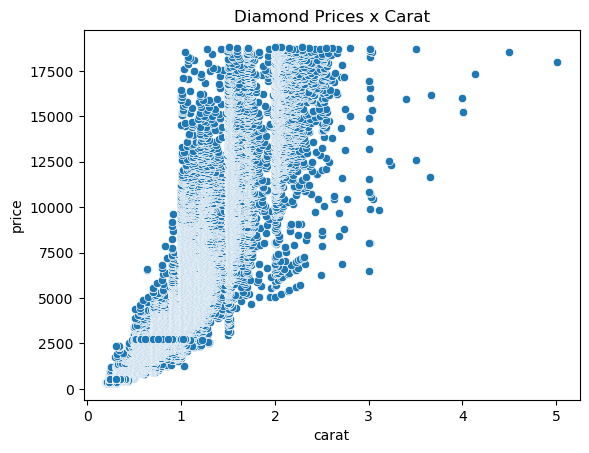

In [4]:
sns.scatterplot(data = diamonds, x = 'carat', y = 'price')
plt.title('Diamond Prices x Carat');

### Insight 1: 

Diamond prices tend to increase with their carat weight.

## Question 2 - What is the impact of the cut quality on diamond prices?

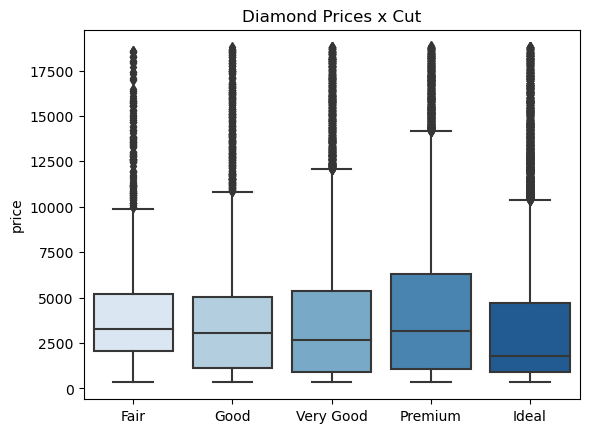

In [5]:
sns.boxplot(data = diamonds, x = 'cut', y = 'price', order= ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], palette = 'Blues')
plt.title('Diamond Prices x Cut')
plt.xlabel(None);

### Insight 2:

The quality of the cut doesn't seem to influence median prices that much. Median prices of Premium cuts are the highest, but also the most spread out. Ideal cuts have the lowest median prices.

## Question 3 - Does the color of the diamond influence the price? If so, how?

In [6]:
def format_label(value):
    # Function to set the data labels format
    if value >= 1000:
        value /= 1000
        return f'{value:.1f}k'
    return int(value)

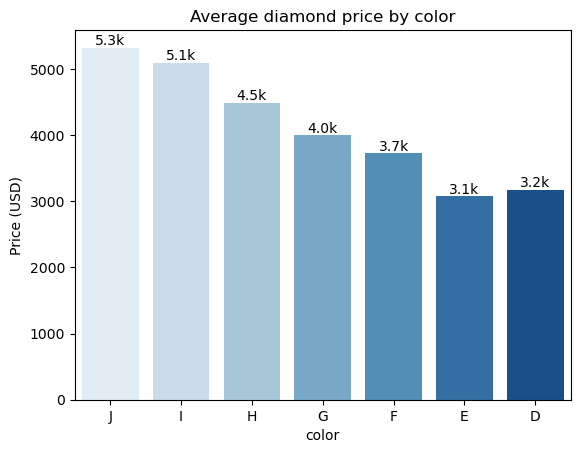

In [7]:
ax = sns.barplot(data = diamonds, y = 'price', x = 'color', order= sorted(diamonds.color.unique(), reverse=True), 
                 palette = 'Blues', ci = None)

for p in ax.patches:
    ax.annotate(f'{format_label(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    
# Set labels and title
plt.ylabel('Price (USD)')
plt.title('Average diamond price by color')

# Show the plot
plt.show()

### Insight 3:

The average diamond prices increases from color D to color J.

## Question 4 - How does clarity impact the price of a diamond?

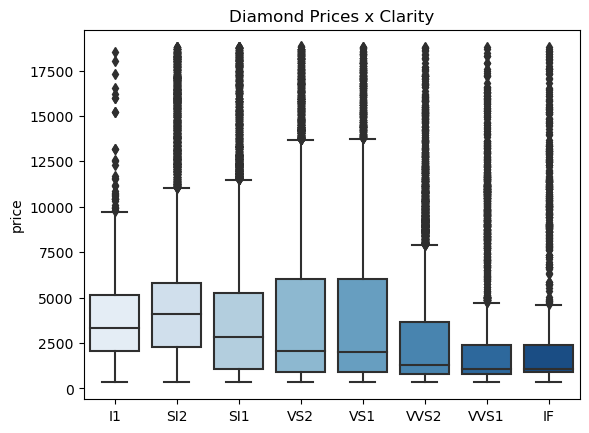

In [8]:
sns.boxplot(data = diamonds, x = 'clarity', y = 'price', order= ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], 
            palette = 'Blues')
plt.title('Diamond Prices x Clarity')
plt.xlabel(None);

### Insight 4:

The clearer the diamond, the less valuable it is.

## Question 5 - How do the diamonds dimensions influence its price?

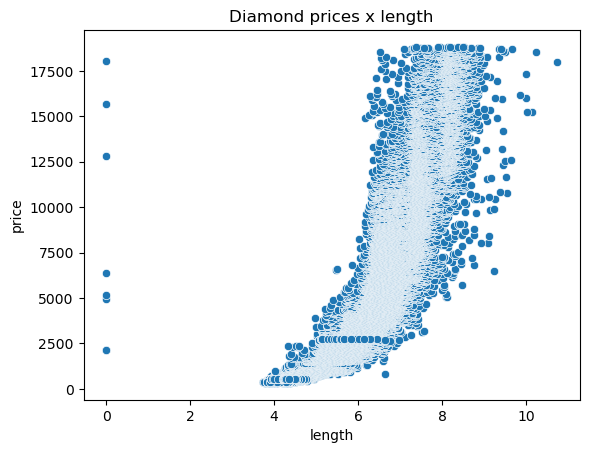

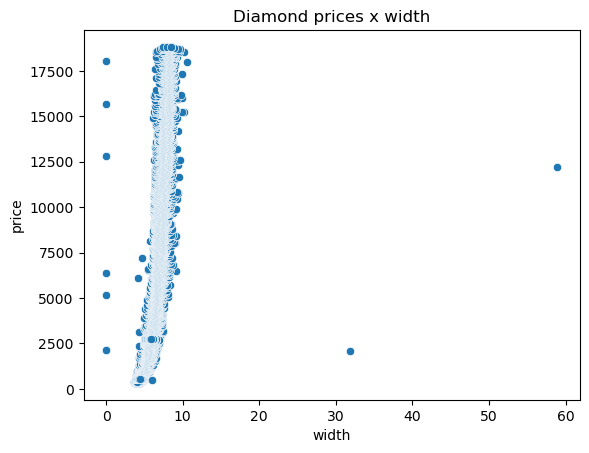

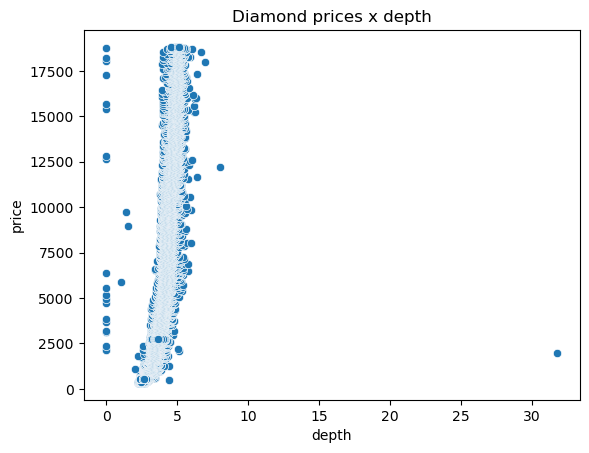

In [9]:
for dim, dimname in zip(['x', 'y', 'z'], ['length', 'width', 'depth']):
    plt.figure()
    plt.title(f"Diamond prices x {dimname}")
    plt.xlabel(dimname)
    sns.scatterplot(data = diamonds, x = dim, y = 'price')

### Insight 5:

The diamond prices increase with length. Width and depth do not seem to influence prices too much.

## Question 6 - How does the table width affect the perceived value of a diamond?

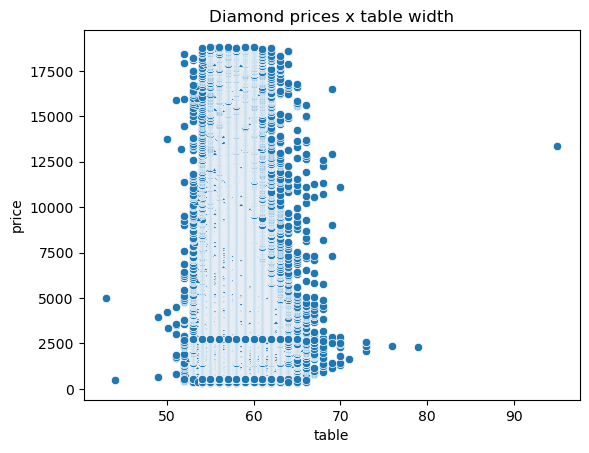

In [10]:
sns.scatterplot(data = diamonds, x = 'table', y = 'price')
plt.title('Diamond prices x table width');

### Insight 6: 

Diamond prices aren't influenced by table width.

# 4 - Price Predictive Model

In [11]:
# Number of unique values per attribute
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [12]:
# Extract categorical features
categorical = [col for col in diamonds.columns if diamonds[col].nunique() <= 10]
categorical

['cut', 'color', 'clarity']

In [13]:
# Extract numerical features
numerical = [col for col in diamonds.columns if col not in categorical and col != "price"]
numerical

['carat', 'depth', 'table', 'x', 'y', 'z']

In [14]:
# Input and output variables
X = diamonds.drop(columns = 'price')
y = diamonds['price']

In [15]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (37758, 9)
X_test shape: (16182, 9)
y_train shape: (37758,)
y_test shape: (16182,)


In [16]:
# Mappings for ordinal categorical variables
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = sorted(diamonds.color.unique(), reverse=True)
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

cut_dict = {i: category for i, category in enumerate(cut_order)}
color_dict = {i: category for i, category in enumerate(color_order)}
clarity_dict = {i: category for i, category in enumerate(clarity_order)}

In [17]:
# Model
lgbmodel = lgb.LGBMRegressor()

# Transformers
numerical_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "median")), ("scaler", StandardScaler())
    ]
)

categorical_transformer = Pipeline(steps=[("cat_encoder", TargetEncoder())])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numerical_transformer, numerical),
        ("cut", categorical_transformer, categorical),
    ]
)

# Full pipeline
pipeline = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("feature_selection", SelectKBest(score_func = f_regression, k = 'all')),
        ("model", lgbmodel),
    ]
)

# Train
pipeline.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 37758, number of used features: 9
[LightGBM] [Info] Start training from score 3951.495312


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cut',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   TargetEncoder())]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000001FE7CD14720>)),
                ('model', LGBMRegressor())])

In [18]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error (MSE): 279308.0689
Root Mean Squared Error (RMSE): 528.4960
Mean Absolute Error (MAE): 279.7735
R2 Score: 0.9821


## Insights:

- Considering the presence of many outliers in the data, shown by the boxplots in EDA section, the MAE might be a better metric to evaluate the model than MSE or RMSE. 
- Considering the standard deviation of about 4k USD in the price target variable, a MAE of 279 is a pretty solid result.
- 98% of the data variance is explained by the model with the selected features

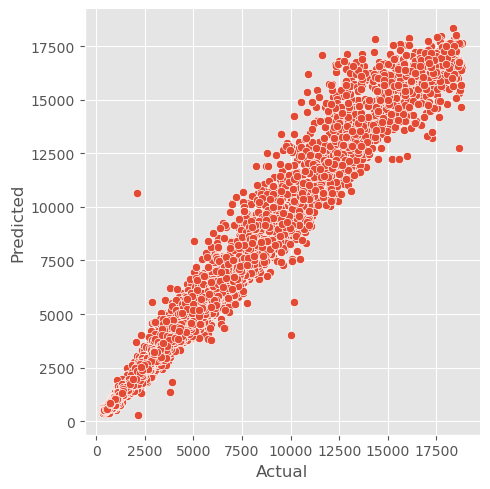

In [19]:
# Creating a visualization of actual and predicted values
plt.style.use("ggplot")
sns.relplot(x = y_test, y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted');

## Insight:

Actual and predicted values are almost in a straight line, which indicates that the model has decent performance.

# 5- Conclusion

In this machine learning project, we embarked on the task of developing a predictive model for diamond prices. Our goal was to leverage the power of data-driven approaches to provide accurate and valuable insights into the diamond pricing market. Through a comprehensive analysis and model development process, we have achieved the following key outcomes:

### Model Performance
Our predictive model demonstrated promising performance in estimating diamond prices. We evaluated the model using industry-standard metrics, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²). The model achieved MAE of 279 USD, RMSE of 528 USD and R² of 98%, indicating both its ability to make reliable price predictions as well as the model fit to the data.

### Key Features
During the course of our analysis, we identified several crucial features that significantly influence diamond prices. These features include carat weight, color, clarity and length. Understanding the impact of these factors is essential for both industry professionals and consumers seeking to make informed decisions.

### Business Implications
The implications of our predictive model for the diamond industry are noteworthy. It can serve as a valuable tool for pricing optimization, inventory management, and decision-making processes. Businesses operating in this sector can leverage the model to enhance pricing strategies and improve overall efficiency.

### Impact
In conclusion, the predictive diamond price model is an examples of how Machine Learning can represent a significant step toward data-driven decision-making. It offers the potential to enhance pricing accuracy and ultimately improve the profitability of businesses in this sector. Next steps would include ongoing model maintenance, regular data updates, and collaboration with industry experts to maximize its benefits.